In [23]:
%matplotlib widget
# removed as jupyter keeps hanging when trying to rotate the 3D plot

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import sys  
from matplotlib.ticker import MaxNLocator
import scipy

In [25]:
names=["TestID", "fuzzOpTimes", "M1_deliv", "M1_missedObj", "M2_timeHandover", "M3_decisionAlert", "FuzzOpCount"]

In [26]:
res_col_subset=["fuzzingOperationTimes", "M1_missedObj", "M2_timeHandover"]

In [27]:
timebased_res = pd.read_csv("timebased-res-80", delim_whitespace=True, names=names, header=0)

In [28]:
timebased_res["M1_missedObj"] = timebased_res["M1_missedObj"].astype(int)
timebased_res

,TestID,fuzzOpTimes,M1_deliv,M1_missedObj,M2_timeHandover,M3_decisionAlert,FuzzOpCount
0,Test:Test_033_21_12_2023_04_53_33,30.355,3.0,3,116.007,1.0,1
1,Test:Test_034_21_12_2023_04_53_33,21.875,3.0,3,111.481,1.0,2
2,Test:Test_036_21_12_2023_04_53_33,30.086,3.0,3,115.593,1.0,1
3,Test:Test_047_21_12_2023_04_53_33,56.953,2.0,4,161.708,1.0,3
4,Test:Test_050_21_12_2023_06_19_36,1.275,4.0,2,120.295,1.0,1
5,Test:Test_063_21_12_2023_06_19_36,17.158,3.0,3,111.286,1.0,1
6,Test:Test_064_21_12_2023_06_19_36,52.007,3.0,3,131.223,1.0,2
7,Test:Test_069_21_12_2023_07_45_46,1.386,3.0,3,0.000,2.0,1
8,Test:Test_074_21_12_2023_07_45_46,1.071,4.0,2,0.000,1.0,1
9,Test:Test_078_21_12_2023_07_45_46,13.363,3.0,3,107.149,1.0,2


In [46]:
def plot_3d_resultset(df, df2, graph_title, savefigFilename,xrot,yrot):
    default_alpha = 1.0
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')    
    ax.view_init(xrot,yrot)
    ax.scatter(df["M1_missedObj"], df["M2_timeHandover"], abs(df["fuzzOpTimes"]), color="blue", alpha=default_alpha, s=8, marker="x")
    ax.set_xlabel("M1: missed object count")
    ax.set_ylabel("M2: handover time")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_zlabel("Fuzzing Operation Times")
    ax.set_title(graph_title)
    plt.tight_layout(pad=0.5)
    plt.savefig(savefigFilename)
    plt.show()

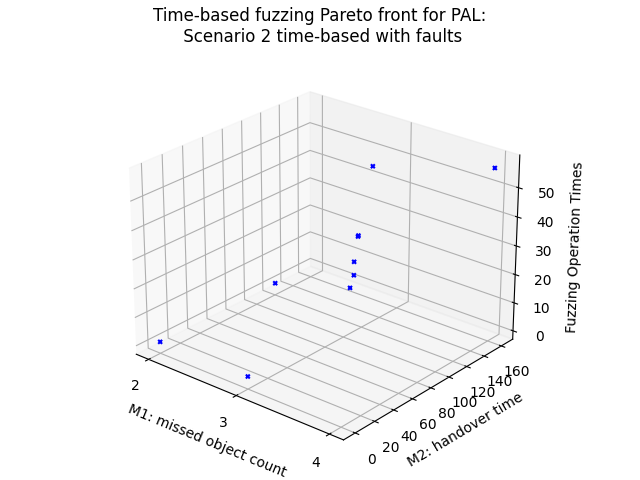

In [47]:
plot_3d_resultset(timebased_res, None, "Time-based fuzzing Pareto front for PAL:\n Scenario 2 time-based with faults", "pal-scenario2-timebased-pareto.pdf", 25, 310)

In [62]:
mo = timebased_res["M1_missedObj"]
th = timebased_res["M2_timeHandover"]
(mo,th)


(0    3
 1    3
 2    3
 3    4
 4    2
 5    3
 6    3
 7    3
 8    2
 9    3
 Name: M1_missedObj, dtype: int64,
 0    116.007
 1    111.481
 2    115.593
 3    161.708
 4    120.295
 5    111.286
 6    131.223
 7      0.000
 8      0.000
 9    107.149
 Name: M2_timeHandover, dtype: float64)

In [64]:
scipy.stats.pearsonr([3, 3, 3, 4, 2, 3, 3, 2, 3], [116.007, 111.481, 115.593, 161.708, 120.295, 111.286, 131.223, 0.0, 107.149])

PearsonRResult(statistic=0.7101968317563895, pvalue=0.03204481296746017)